# Homework 1: self-avoiding random walk
**Deadline: Sept 17, 12:00**
#### General instructions:
1. Below you will find a programming assignment, and a piece of associated (incomplete) code, that you are asked to complete.
2. Some questions ask you to generate some output (i.e. plots), or a written answer. For questions that ask you to generate output, it suffices to simply have your code create the correct output (with properly labeled axes, etc.,). For written answers, you can double-click on the cells under the 'answers' section and type your answer there.
3. Send in a completed version of this notebook (both .ipynb and .html/pdf format, including the output), with your name and student number added, to h.w.de.vries@rug.nl and h.jafarinia@rug.nl before (!) the deadline.
4. The homework set is graded on a pass/fail basis. In order to pass, you are at least expected to demonstrate a working code  that you then use to find a plot of the minimum energy per chain length.

In this homework assignment, you will investigate protein folding using a highly-simplified model that is based on a self-avoiding random walk. A protein is a large biological molecule made up of molecular chains (the residues of amino acids). These chains are formed from monomers, that is, molecules that bind chemically with other molecules. More specifically, these chains consist of nonpolar hydrophobic (H) monomers that are repelled by water, and polar (P) monomers that are attracted by water. The actual structure of a protein results from a folding process in which random coils of chains rearrange themselves into a configuration of minimum energy. 

Although molecular dynamics (Chapter 18) may be used to simulate protein folding, it is much slower than Monte Carlo techniques, and even then, it is hard to find the lowest energy states within a reasonable timeframe. Here we introduce a program (which you need to finish up) where you take a self-avoiding random walk on a 2D square lattice. This means the following: at the end of each random step on the grid, you choose an H or a P monomer (depending on a weighting factor that you can modify) and drop it which will be dropped on the selected grid point. The grid point is restricte, meaning that the new H/P monomer should be an extension of the existing protein chain, where it can only occupy a site that is not occupied yet. As soon as the protein chain gets stuck and cannoth extend any further, the simulation stops.

The goal of the simulation that we just described is to find the lowest energy states of our model proteins, comprising different lengths and/or relative compositions (i.e. the amount of H- and P-monomers present). The energy of our model protein chain is defined as:
$$ E=-\epsilon{f},$$ 
where $E$ is the total energy of the chain, $\epsilon$ the energy associated with a single contact between two H-monomers and $f$ the total number of H-H contacts. A contact here is defined as two H-monomers being present next to each other on the grid, while not being each other's direct neighbors within the chain. Note that only H-H bonds count towards the energy, and that H-P and P-P bonds do not. For example: if the neighbor next to an H-monomer is another H-monomer, it lowers the energy, but if it is a P it does not lower the energy of the protein chain. This principle is illustrated in the below example output. As is shown, yellow dots indicate the contact between two H-monomers that are not each others direct neighbors in the protein chain. The total number of yellow dots should correspond to the total energy!

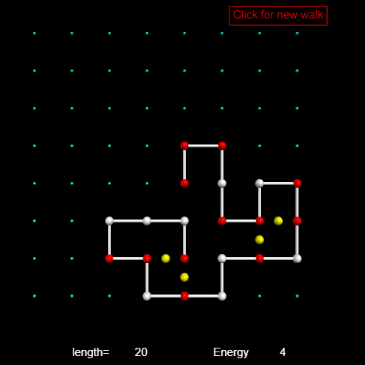





## Questions:

### Programming tasks:
In the code cell below we have prepared parts of the program for you; where indicated using comments (and in the below list), you are expected to expand the code (carefully look at the surrounding code to observe what is missing and to help you with coding). To clarify the structure of the program, we inserted several commenting lines (inserted in red text) in the code.  The following summation indicates which parts of the code are still missing (in the code, thse are labeled using Q#, with # the question number).

1. Finish the function (named selectcol()) that calculates a random number and compares it to your weighting factor, and subsequently determines the choice of an H or P monomer.
2. Finish the findenergy() function by inserting the correct checks for determining whether the rightmost and upper neighbors of an H-monomer are also H monomers, and if so, add their energies and plot a yellow dot in between the monomer and its neighbor
3. There are two conditions that need to be met if you freely want to walk in the +/- x- or y-directions. We inserted half of the condition in the while-loop: you are asked to insert the second one (hint: occupation!)
4. There should be an equal chance of stepping upwards, downwards, sidewards, etc., as long as you are not near the edge of the grid yet. Insert the code for making (equally weighted) random steps in all directions.
5. For moving along the edge of the grid, the weights for the random walk are different. We commented on the code for one of the four edges its random walk, but left the comments on the code for three other edges out. Complete the code for the random walk along one of the edges, after identifying which edge is being considered.
6. [not included in the code]: Store the energy and chain length in a relevant type of array, list, etc., such that you can plot them at a later point for the questions below.





### Questions/analyses:
1. Perform about $100$ simulations (the more the better), while storing the chain length and minimum energy into a relevant data structure.
2. Produce a scatter plot of energy vs chain length for your runs.
3. Make a plot of the minimum chain energy for any given chain length. What sort of trend can you identify?
4. Now, analyze the effect of a varying composition of H and P monomers. To do so, vary the weighting factor such that the protein is very hydrophobic (i.e. many H monomers), all the way down to a more hydrophilic/polar protein (i.e. many P monomers) in 5 steps (i.e. 80%H, 60%H, on average, etc.). Repeat questions 2 and 3 for each composition. What can you conclude on the effect of an increased hydrophobicity of the protein?


In [ ]:
#For optimization purpose I have had to modify the code leaving out the clicking of the graph(and adding a loop) for answering all the  questions
#At the end of this doccument i repeated all the code but with the clinking graph working properly.

In [ ]:
""" Adapted from "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation. Code edited by H.W. de Vries, H. Jafarinia""" 

# A self avoiding random walk that stops when neighbors are occupied
# or at a corner. Energy = -f|eps|; f=1 for neighbor H, f=0 for neighbor P
# Yellow dots show not connected neighbour
import numpy as np
from vpython import *
from numpy import *

import random
Maxx=500                             #canvas width
Maxy=500                             #and height
ran=25
#graph1 = canvas( width=Maxx, height=Maxy,title='Self Avoiding Random Walk',range=ran)
positions=points(color=color.cyan,radius=2)
M=[]                    # to plot red or white points
L=100                   # maximum length of a polymer
m=100
n=100

DD=[]                   # will contain the protein's x coordinate, y coordinate and choice of H/P monomer
size =8                 #array size x size 
size2=size*2            # net in which H P are located
nex=0



"""
Selectcol(): compares a random number to a weighting factor, and based on the comparison (i.e. larger or smaller) returns 
a color vector (white or red) and a numerical value (1 or 2) for P and H monomers, resp. 
"""

def selectcol():         
   #Q1: Build in your random choice of H/P monomer in the below function, together with a weighting factor
    probabilityH=0.7         #insert a number between 0 and 1 fr the probability of the H monomer
                             #probabilityP=1-probabilityH

    choice=random.random()   

    if  choice<probabilityH:
        col=vector(1,0,0)       # hydrophobic color red
        r=2                     # for hydrophobic
    else:
        col=vector(1,1,1)       # polar color white
        r=1                     # for polar
    return col,r

"""
findrest(indexNumberofMonomer,totalProteinLength,xCoordinate,yCoordinate): initializes an energy value, and then loops
over the length of the protein. In the loop, it checks whether the coordinates  xCoordinate and yCoordinate that you 
inserted match those of any of the monomers. If that is the case (and the monomer == H), then a bond is formed, and
energy is set to 1, and this value is returned by the function

"""
def findrest(m,length,fin,fjn):  
    ener=0                       # Initialize energy
    for t in range(m,length+1):  # next link not considered
        #given input coordinates (fin), (fjn) check all following monomers for whether they are at this position, and are H
        if DD[t][0]==fin and DD[t][1]==fjn and DD[t][2]==2: 
            ener=1               # if a match is found; return an energy of 1
    return ener
        
    
"""
findenergy(totalproteinLength,arrayContainingAllMonomerCoordinatesAndTheirColor): this function does the following:
-Loops over all monomers in the protein chain
-For each monomer, stores the x-coordinate and y-coordinate in i and j, and the color in cl,
-Checks whether the monomer is polar (P), if so: do nothing
-Checks whether the monomer is apolar (H), if so: do:
    -Check all neighbors of the H-monomer: 
        -First, hop one site to the left and check for existence of an H monomer using findrest()
              -Add outcome of findrest(), either 0 or 1 to the total energy of the chain
              -if it is an H-monomer, Use a little coordinate shift and plot a yellow dot halfway between the two H-beads
        -Second, hop one site to the right, check for existence of an H- monomer using findrest(), perform same steps
        -Third, idem but for one site upwards
        -Fourth, idem but for one site downwards
        
Once all is checked, the function returns the total chain energy
             
"""
def findenergy(length,DD):       # finds energy of each link
    energy=0                     # begins with no energy     
   
    for n in range (0,length+1):
        i=DD[n][0]
        j=DD[n][1]
        cl=DD[n][2]       
        if cl==1:    # if white (i.e. P), no energy is added to the total
            pass
        else:        # red 
            if n<length+1:
                imin=int(i-1)        # check neighbour i-1,j
                js=int(j)
                if imin>=0:
                    e=findrest(n+2,length,imin,js) # return energy 1 
                    energy=energy+e
                    if e==1:    # plot yellow dot in midle of neighbourhola
                            xol=4*(i-0.5)-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*j+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6) #this part plots a yellow dot to indicate hydrogen bonding.
              

                ima=int(i+1)
                js=int(j)
                if ima<=size-1:      #  # check neighbour i+1,j
             #Q2: Complete this conditional statement, such that it checks neighbor (i+1,j) and adds the correct energy
             #    if there is a link. 
                    e=findrest(n+2,length,ima,js)
                    energy=energy+e
                    if e==1:   
                            xol=4*(i+0.5)-size2             
                            yol=-4*j+size2 
                            
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                iss=int(i)
                jma=int(j+1)
                if jma<=size-1:   #check neighbour i,j+1
                    e=findrest(n+2,length,iss,jma)
                    energy=energy+e       
                    if e==1:      
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j+0.5)+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                    
                    
                iss=i
                jmi=j-1
                if jmi>=0:        # check neighbor i, j-1
            #Q2: Finish this conditional statement for checking upper neighbor (i,j-1), such that it 
            #    adds the correct amount of energy if this is the case.
                     e=findrest(n+2,length,iss,jmi)
                     energy=energy+e 
                     if e==1:    # plot yellow dot in midle of neighbour
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j-0.5)+size2          
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
    
    return energy   # after checking all neighbours of each element in chain, the function returns the energy


"""
function net(): Do not pay too much attention to this function, it is used for plotting the grid
"""

def net():                          #plots points in the visualization  
    for j in range(0,size):  
        yp=-4*j+size2                  # y world to screen coord. transformation
        for i in range (0,size):    #horizontal row
            xp=4*i-size2               # x world to screen coord. transformation
            
            positions.append(vector(xp,yp,0))
net()
length=0


"""
This is where the magic starts; the while 1 loop indicates that the program keeps running indefinitely. 
-In the first block, several coordinates are initiated (commented individually).
-The while statement (check question 3) determines when the code can still run. This is when all conditions for a self-avoiding
 random walk are met: there should still be unoccupied space around the current position of the most recently added monomer. 
 (Ask yourself: what two options prevent the chain from going anywhere?)
     - If the above criteria are met, a random number is called, and there is a 25% chance to move in either direction
     - The code checks whether there is a free spot, and performs the step
     - the relevant functions are called for determining whether the monomer is H or P
     - The properties of the grid point are added to DD[], such that the monomer position and type are stored.
- The above continues as long as you are not at the edge. If you hit an edge, the weighting changes. The rest of the routine
  does not change, however. 
     - If we now get stuck at the edge or a corner, the code exits
     
-Plots are made (they were updated with each random walk step by plotting of a new point/H-bond)
-Energies are calculated
-A click contintues the code for another run

"""
energystorage=[]
lengthstorage=[]
k=0
iterationsmax=int(input('Insert the number of iterations'))

while k<iterationsmax:                             # to make as many walks as you like
      
    pts2=label(pos=vector(-5, -18,0), box=0) # to write No links
    length=0                          # to determine length of walk
    grid = zeros((size,size))         # array for particle positions
    D=zeros((L,m,n))
    DD=[]
    i=size//2                          # center of grid  #we use // instead of single / to have i,j as integers
    j=size//2
    xol=4*i-size2                     #always start at middle, x coord. transform 4*i-size2 (plotting purposes)
    yol=-4*j+size2                    # y coord transform -4*j+size2
    col,c=selectcol()                 #determine H/P for the first monomer
    grid[i,j] = c                     #particle in center, grid[i,j] keeps track of the H,P-values of the grid 
    M=M+[points(pos=vector(xol,yol,0),color=col, radius=6)]  #red point at center (plotting purposes)
    
    #print(" start!!     ") #code starts running!#
    
    DD=DD+[[i,j,c]]        #here we add the first point to the array that contains all protein info

    
    """ In this first part, steps in the +/- x,y directions are made at random""" 
  #Q3: Complete the below while statement. Within the and(...) statement the second condition for continuing your random walk
  #    freely has to be inserted.
  #    Hint: it might have something to do with the occupation of the grid points!
    while (i>0 and i<size-1 and j>0 and j<size-1 and (grid[i+1,j]==0 or grid[i-1,j]==0 or grid[i,j+1]==0 or grid[i,j-1]==0)): #esa posicion i,j no haya sido utililzada,es deceir no tenga un punto rojo o blanco 
       
    
     
            r=random.random()             #call random no. between 0 and 1, and compare to weights to assign a direction
        if r<0.25 :                   # probability 25%
            if grid[i+1,j]==0:        # is the grid point to the right empty?
                i+=1                  # if so: move one step to right
        elif  r>=0.25 and r<0.5:
            if grid[i-1,j]==0:
                i-=1
        elif  r>=0.5 and r<=0.75:
            if grid[i,j+1]==0:
                j+=1
        else:
            if grid[i,j-1]==0:
                j-=1
       #Q4: Obviously, you can also step leftwards, downwards or upwards. Add elif and else statements to move leftwards,
       #    down- and upwards here. Look at the example for moving to the right for an example.
       #    Moreover: think about how you compare your random number to a weight to assign equal chances for moving
       #    leftwards, rightwards, upwards, downwards.    
   
    
        if grid[i,j]==0:        
            col,c=selectcol()  
            grid[i,j]=c              # add information on H,P to the grid
            length+=1                # once that grid point is occupied increase length of the protein
           
           
            DD=DD+[[i,j,c]]          # add the new grid point, coordinates and H,p-ness to the storage array of the protein
            xp=4*i-size2             # coordinate transformation (plotting purposes)
            yp=-4*j+size2                   
             
            curve(pos=[vector(xol,yol,0),vector(xp,yp,0)]) #plot link last position to new one (plotting purposes)
          
            M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #plot the current point (plotting purposes)
            xol=xp                          #start of new line
            yol=yp                          #y calculated is now old y (for connecting the points in the next loop iteration)
        
   
        while (j==(size-1) and i !=0 and i !=(size-1)):   # In case you are at the top row
            
            r1=random.random()
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                    i+=1
            else:                             # probability 60% move down
                 if grid[i,j-1]==0:
                    j-=1
            if grid[i,j]==0:                  #if the new point is not assigned H,P, yet...
                col,c=selectcol()                 # choose H,P
                grid[i,j]=c                       # grid point occupied --> assign value of H,P
                length+=1                          #chain grew by one monomer
                 
                DD=DD+[[i,j,c]]                  #store coordinates and properties of newest monomer!
                xp=4*i-size2                         #coord transformation (plotting purposes)
                yp=-4*j+size2
                  
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])     # (plotting purposes): line connecting new point
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #(plotting purposes): add the new point 
                xol=xp                            
                yol=yp      # next case last row stop if corner or busy neighbors
             
            if (i==0 or i==(size-1)) or (grid[i-1,size-1]!=0 and grid[i+1,size-1]!=0):
                break #break out of loop, you cannot (!!) make any new monomers anymore since the endpoint is stuck.
                
  
                
#Q5: Add the correct statements below here to make sure that you have 20/20/60% chance of moving along and away from the edge.
#    Which edge is this, anyways? Check the below while loop/break statement and insert the correct if/elife statements.             
       
        while (j==0 and i !=0 and i !=(size-1)):# Which row is this? this is the bottom row
            r1=random.random()  
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                        i+=1
            else:                             # probability 60% move up
                 if grid[i,j+1]==0:
                    j+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
                
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
              
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if i==(size-1) or i==0 or (grid[i-1,0]!=0 and grid[i+1,0]!=0):
                break
                
        while (i==0 and j !=0 and j !=(size-1)):
            r1=random.random()
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i+1,j]==0:
                    i+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
              
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or j==0 or (grid[0,j+1]!=0 and grid[0,j-1]!=0):
                break
                
        while (i==(size-1) and j !=0 and j !=(size-1)): 
            r1=random.random()
            
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i-1,j]==0:
                    i-=1
            
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
                col,c=selectcol()
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or (grid[size-1,j+1]!=0 and grid[size-1,j-1]!=0):
                break
    k+=1
    energystorage.append(findenergy(length,DD))  
    lengthstorage.append(length)  
    
    
        
                                                                         
    """
    label(pos=vector(-10, -18,0), text='length=', box=0)     # Plotting purposes
    
    
    label(pos=vector(10,18,0), text='Click for new walk',color=color.red, canvas=graph1)
    pts2.text = '%4s' %length      # place length of walk
    
    
    label(pos=vector(5,-18,0), text='Energy',box=0)
    
    
    evalue=label(pos=vector(10, -18,0), box=0)
    
    evalue.text = '%4s' %findenergy(length,DD)   
    print("energy is ",findenergy(length,DD))     #idem but in the terminal output.


    graph1.waitfor('click')                # detect mouse click to make an extra run. 
     
    
    for obj in graph1.objects:      # to start new walk
        if (obj is positions or obj is curve):     continue
        obj.visible = 0  # clear curve to make new on
        
        """
        


### Answers
_Please double-click the cells below and type-in your answers. If you then click 'run', you will see that the text is compiled._

question 1:


In [2]:
#0.7 probability of H

#I have had to modify the code leaving out the clicking of the graph, after 100 iterations I have obtained the following values for the energy and chain length,
import numpy as np
import pandas as pd
type([energystorage])  
Storage= { 'Energy' : pd.Series(energystorage),
      'Chain Length': pd.Series(lengthstorage) }
FinalStorage = pd.DataFrame( data = Storage)

FinalStorage.sort_values(by=['Chain Length'])



,Energy,Chain Length
86,0,6
14,0,6
21,0,7
59,2,8
96,1,8
8,0,8
69,0,8
15,2,9
48,0,9
17,1,9


question 2:

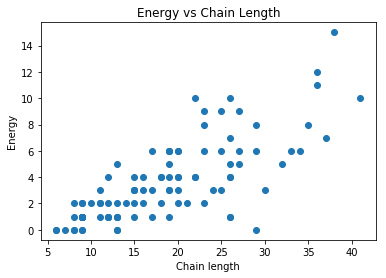

In [4]:
#0.7 probability of H

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.xlabel('Chain length')
plt.ylabel('Energy')
plt.title("Energy vs Chain Length")

x=lengthstorage
y=energystorage

ax.scatter(x,y)

question 3:

Text(0,0.5,'Minimum Energy')

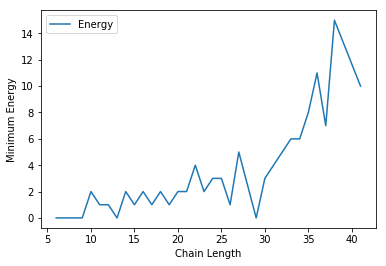

In [5]:
#0.7 probability of H

minimumFinalStorage=FinalStorage.groupby("Chain Length").min()
minimumFinalStorage.plot.line()

plt.xlabel('Chain Length')
plt.ylabel('Minimum Energy')

#We can see that the minimum energy increases with the chain length. That happens because the longer the molecule is the higher probability there is that the energy increases by one.

In [ ]:
# Question 4: No we can analyze the effect of a varying composition of H and P monomers,if there is more H monomers the trendy is to get more energy
#In the next code any kind of probability for the H monomerscan be inserted. Run it for getting the graphs and plots

In [ ]:
""" Adapted from "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation. Code edited by H.W. de Vries, H. Jafarinia""" 

# A self avoiding random walk that stops when neighbors are occupied
# or at a corner. Energy = -f|eps|; f=1 for neighbor H, f=0 for neighbor P
# Yellow dots show not connected neighbour
import numpy as np
from vpython import *
from numpy import *

import random
Maxx=500                             #canvas width
Maxy=500                             #and height
ran=25
#graph1 = canvas( width=Maxx, height=Maxy,title='Self Avoiding Random Walk',range=ran)
positions=points(color=color.cyan,radius=2)
M=[]                    # to plot red or white points
L=100                   # maximum length of a polymer
m=100
n=100

DD=[]                   # will contain the protein's x coordinate, y coordinate and choice of H/P monomer
size =8                 #array size x size 
size2=size*2            # net in which H P are located
nex=0



"""
Selectcol(): compares a random number to a weighting factor, and based on the comparison (i.e. larger or smaller) returns 
a color vector (white or red) and a numerical value (1 or 2) for P and H monomers, resp. 
"""

def selectcol():         
   #Q1: Build in your random choice of H/P monomer in the below function, together with a weighting factor
    probabilityH=int(input('Insert the probability of H from 0 to 100'))//100 
    #ability of the H monomer
                             #probabilityP=1-probabilityH

    choice=random.random()   

    if  choice<probabilityH:
        col=vector(1,0,0)       # hydrophobic color red
        r=2                     # for hydrophobic
    else:
        col=vector(1,1,1)       # polar color white
        r=1                     # for polar
    return col,r

"""
findrest(indexNumberofMonomer,totalProteinLength,xCoordinate,yCoordinate): initializes an energy value, and then loops
over the length of the protein. In the loop, it checks whether the coordinates  xCoordinate and yCoordinate that you 
inserted match those of any of the monomers. If that is the case (and the monomer == H), then a bond is formed, and
energy is set to 1, and this value is returned by the function

"""
def findrest(m,length,fin,fjn):  
    ener=0                       # Initialize energy
    for t in range(m,length+1):  # next link not considered
        #given input coordinates (fin), (fjn) check all following monomers for whether they are at this position, and are H
        if DD[t][0]==fin and DD[t][1]==fjn and DD[t][2]==2: 
            ener=1               # if a match is found; return an energy of 1
    return ener
        
    
"""
findenergy(totalproteinLength,arrayContainingAllMonomerCoordinatesAndTheirColor): this function does the following:
-Loops over all monomers in the protein chain
-For each monomer, stores the x-coordinate and y-coordinate in i and j, and the color in cl,
-Checks whether the monomer is polar (P), if so: do nothing
-Checks whether the monomer is apolar (H), if so: do:
    -Check all neighbors of the H-monomer: 
        -First, hop one site to the left and check for existence of an H monomer using findrest()
              -Add outcome of findrest(), either 0 or 1 to the total energy of the chain
              -if it is an H-monomer, Use a little coordinate shift and plot a yellow dot halfway between the two H-beads
        -Second, hop one site to the right, check for existence of an H- monomer using findrest(), perform same steps
        -Third, idem but for one site upwards
        -Fourth, idem but for one site downwards
        
Once all is checked, the function returns the total chain energy
             
"""
def findenergy(length,DD):       # finds energy of each link
    energy=0                     # begins with no energy     
   
    for n in range (0,length+1):
        i=DD[n][0]
        j=DD[n][1]
        cl=DD[n][2]       
        if cl==1:    # if white (i.e. P), no energy is added to the total
            pass
        else:        # red 
            if n<length+1:
                imin=int(i-1)        # check neighbour i-1,j
                js=int(j)
                if imin>=0:
                    e=findrest(n+2,length,imin,js) # return energy 1 
                    energy=energy+e
                    if e==1:    # plot yellow dot in midle of neighbourhola
                            xol=4*(i-0.5)-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*j+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6) #this part plots a yellow dot to indicate hydrogen bonding.
              

                ima=int(i+1)
                js=int(j)
                if ima<=size-1:      #  # check neighbour i+1,j
             #Q2: Complete this conditional statement, such that it checks neighbor (i+1,j) and adds the correct energy
             #    if there is a link. 
                    e=findrest(n+2,length,ima,js)
                    energy=energy+e
                    if e==1:   
                            xol=4*(i+0.5)-size2             
                            yol=-4*j+size2 
                            
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                iss=int(i)
                jma=int(j+1)
                if jma<=size-1:   #check neighbour i,j+1
                    e=findrest(n+2,length,iss,jma)
                    energy=energy+e       
                    if e==1:      
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j+0.5)+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                    
                    
                iss=i
                jmi=j-1
                if jmi>=0:        # check neighbor i, j-1
            #Q2: Finish this conditional statement for checking upper neighbor (i,j-1), such that it 
            #    adds the correct amount of energy if this is the case.
                     e=findrest(n+2,length,iss,jmi)
                     energy=energy+e 
                     if e==1:    # plot yellow dot in midle of neighbour
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j-0.5)+size2          
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
    
    return energy   # after checking all neighbours of each element in chain, the function returns the energy


"""
function net(): Do not pay too much attention to this function, it is used for plotting the grid
"""

def net():                          #plots points in the visualization  
    for j in range(0,size):  
        yp=-4*j+size2                  # y world to screen coord. transformation
        for i in range (0,size):    #horizontal row
            xp=4*i-size2               # x world to screen coord. transformation
            
            positions.append(vector(xp,yp,0))
net()
length=0


"""
This is where the magic starts; the while 1 loop indicates that the program keeps running indefinitely. 
-In the first block, several coordinates are initiated (commented individually).
-The while statement (check question 3) determines when the code can still run. This is when all conditions for a self-avoiding
 random walk are met: there should still be unoccupied space around the current position of the most recently added monomer. 
 (Ask yourself: what two options prevent the chain from going anywhere?)
     - If the above criteria are met, a random number is called, and there is a 25% chance to move in either direction
     - The code checks whether there is a free spot, and performs the step
     - the relevant functions are called for determining whether the monomer is H or P
     - The properties of the grid point are added to DD[], such that the monomer position and type are stored.
- The above continues as long as you are not at the edge. If you hit an edge, the weighting changes. The rest of the routine
  does not change, however. 
     - If we now get stuck at the edge or a corner, the code exits
     
-Plots are made (they were updated with each random walk step by plotting of a new point/H-bond)
-Energies are calculated
-A click contintues the code for another run

"""
energystorage=[]
lengthstorage=[]
k=0
iterationsmax=int(input('Insert the number of iterations'))

while k<iterationsmax:                             # to make as many walks as you like
      
    pts2=label(pos=vector(-5, -18,0), box=0) # to write No links
    length=0                          # to determine length of walk
    grid = zeros((size,size))         # array for particle positions
    D=zeros((L,m,n))
    DD=[]
    i=size//2                          # center of grid  #we use // instead of single / to have i,j as integers
    j=size//2
    xol=4*i-size2                     #always start at middle, x coord. transform 4*i-size2 (plotting purposes)
    yol=-4*j+size2                    # y coord transform -4*j+size2
    col,c=selectcol()                 #determine H/P for the first monomer
    grid[i,j] = c                     #particle in center, grid[i,j] keeps track of the H,P-values of the grid 
    M=M+[points(pos=vector(xol,yol,0),color=col, radius=6)]  #red point at center (plotting purposes)
    
    #print(" start!!     ") #code starts running!#
    
    DD=DD+[[i,j,c]]        #here we add the first point to the array that contains all protein info

    
    """ In this first part, steps in the +/- x,y directions are made at random""" 
  #Q3: Complete the below while statement. Within the and(...) statement the second condition for continuing your random walk
  #    freely has to be inserted.
  #    Hint: it might have something to do with the occupation of the grid points!
    while (i>0 and i<size-1 and j>0 and j<size-1 and (grid[i+1,j]==0 or grid[i-1,j]==0 or grid[i,j+1]==0 or grid[i,j-1]==0)): #esa posicion i,j no haya sido utililzada,es deceir no tenga un punto rojo o blanco 
       
    
     
        r=random.random()             #call random no. between 0 and 1, and compare to weights to assign a direction
        if r<0.25 :                   # probability 25%
            if grid[i+1,j]==0:        # is the grid point to the right empty?
                i+=1                  # if so: move one step to right
        elif  r>=0.25 and r<0.5:
            if grid[i-1,j]==0:
                i-=1
        elif  r>=0.5 and r<=0.75:
            if grid[i,j+1]==0:
                j+=1
        else:
            if grid[i,j-1]==0:
                j-=1
       #Q4: Obviously, you can also step leftwards, downwards or upwards. Add elif and else statements to move leftwards,
       #    down- and upwards here. Look at the example for moving to the right for an example.
       #    Moreover: think about how you compare your random number to a weight to assign equal chances for moving
       #    leftwards, rightwards, upwards, downwards.    
   
    
        if grid[i,j]==0:        
            col,c=selectcol()  
            grid[i,j]=c              # add information on H,P to the grid
            length+=1                # once that grid point is occupied increase length of the protein
           
           
            DD=DD+[[i,j,c]]          # add the new grid point, coordinates and H,p-ness to the storage array of the protein
            xp=4*i-size2             # coordinate transformation (plotting purposes)
            yp=-4*j+size2                   
             
            curve(pos=[vector(xol,yol,0),vector(xp,yp,0)]) #plot link last position to new one (plotting purposes)
          
            M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #plot the current point (plotting purposes)
            xol=xp                          #start of new line
            yol=yp                          #y calculated is now old y (for connecting the points in the next loop iteration)
        
   
        while (j==(size-1) and i !=0 and i !=(size-1)):   # In case you are at the top row
            
            r1=random.random()
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                    i+=1
            else:                             # probability 60% move down
                 if grid[i,j-1]==0:
                    j-=1
            if grid[i,j]==0:                  #if the new point is not assigned H,P, yet...
                col,c=selectcol()                 # choose H,P
                grid[i,j]=c                       # grid point occupied --> assign value of H,P
                length+=1                          #chain grew by one monomer
                 
                DD=DD+[[i,j,c]]                  #store coordinates and properties of newest monomer!
                xp=4*i-size2                         #coord transformation (plotting purposes)
                yp=-4*j+size2
                  
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])     # (plotting purposes): line connecting new point
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #(plotting purposes): add the new point 
                xol=xp                            
                yol=yp      # next case last row stop if corner or busy neighbors
             
            if (i==0 or i==(size-1)) or (grid[i-1,size-1]!=0 and grid[i+1,size-1]!=0):
                break #break out of loop, you cannot (!!) make any new monomers anymore since the endpoint is stuck.
                
  
                
#Q5: Add the correct statements below here to make sure that you have 20/20/60% chance of moving along and away from the edge.
#    Which edge is this, anyways? Check the below while loop/break statement and insert the correct if/elife statements.             
       
        while (j==0 and i !=0 and i !=(size-1)):# Which row is this? this is the bottom row
            r1=random.random()  
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                        i+=1
            else:                             # probability 60% move up
                 if grid[i,j+1]==0:
                    j+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
                
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
              
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if i==(size-1) or i==0 or (grid[i-1,0]!=0 and grid[i+1,0]!=0):
                break
                
        while (i==0 and j !=0 and j !=(size-1)):
            r1=random.random()
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i+1,j]==0:
                    i+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
              
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or j==0 or (grid[0,j+1]!=0 and grid[0,j-1]!=0):
                break
                
        while (i==(size-1) and j !=0 and j !=(size-1)): 
            r1=random.random()
            
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i-1,j]==0:
                    i-=1
            
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
                col,c=selectcol()
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or (grid[size-1,j+1]!=0 and grid[size-1,j-1]!=0):
                break
    k+=1
    energystorage.append(findenergy(length,DD))  
    lengthstorage.append(length)  
    
    

 


import pandas as pd
type([energystorage])  
Storage= { 'Energy' : pd.Series(energystorage),
      'Chain Length': pd.Series(lengthstorage) }
FinalStorage = pd.DataFrame( data = Storage)

FinalStorage.sort_values(by=['Chain Length'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.xlabel('Chain length')
plt.ylabel('Energy')
plt.title("Energy vs Chain Length")

x=lengthstorage
y=energystorage

ax.scatter(x,y)

minimumFinalStorage=FinalStorage.groupby("Chain Length").min()
minimumFinalStorage.plot.line()

plt.xlabel('Chain Length')
plt.ylabel('Minimum Energy')



In [ ]:
#CODE WITH THE CLIKING GRAPH WORKING

In [ ]:



#Code with the Clicking graph working




""" Adapted from "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation. Code edited by H.W. de Vries, H. Jafarinia""" 

# A self avoiding random walk that stops when neighbors are occupied
# or at a corner. Energy = -f|eps|; f=1 for neighbor H, f=0 for neighbor P
# Yellow dots show not connected neighbour
import numpy as np
from vpython import *
from numpy import *

import random
Maxx=500                             #canvas width
Maxy=500                             #and height
ran=25
graph1 = canvas( width=Maxx, height=Maxy,title='Self Avoiding Random Walk',range=ran)
positions=points(color=color.cyan,radius=2)
M=[]                    # to plot red or white points
L=100                   # maximum length of a polymer
m=100
n=100

DD=[]                   # will contain the protein's x coordinate, y coordinate and choice of H/P monomer
size =8                 #array size x size 
size2=size*2            # net in which H P are located
nex=0



"""
Selectcol(): compares a random number to a weighting factor, and based on the comparison (i.e. larger or smaller) returns 
a color vector (white or red) and a numerical value (1 or 2) for P and H monomers, resp. 
"""

def selectcol():         
   #Q1: Build in your random choice of H/P monomer in the below function, together with a weighting factor
    probabilityH=0.7         #insert a number between 0 and 1 fr the probability of the H monomer
                             #probabilityP=1-probabilityH

    choice=random.random()   

    if  choice<probabilityH:
        col=vector(1,0,0)       # hydrophobic color red
        r=2                     # for hydrophobic
    else:
        col=vector(1,1,1)       # polar color white
        r=1                     # for polar
    return col,r

"""
findrest(indexNumberofMonomer,totalProteinLength,xCoordinate,yCoordinate): initializes an energy value, and then loops
over the length of the protein. In the loop, it checks whether the coordinates  xCoordinate and yCoordinate that you 
inserted match those of any of the monomers. If that is the case (and the monomer == H), then a bond is formed, and
energy is set to 1, and this value is returned by the function

"""
def findrest(m,length,fin,fjn):  
    ener=0                       # Initialize energy
    for t in range(m,length+1):  # next link not considered
        #given input coordinates (fin), (fjn) check all following monomers for whether they are at this position, and are H
        if DD[t][0]==fin and DD[t][1]==fjn and DD[t][2]==2: 
            ener=1               # if a match is found; return an energy of 1
    return ener
        
    
"""
findenergy(totalproteinLength,arrayContainingAllMonomerCoordinatesAndTheirColor): this function does the following:
-Loops over all monomers in the protein chain
-For each monomer, stores the x-coordinate and y-coordinate in i and j, and the color in cl,
-Checks whether the monomer is polar (P), if so: do nothing
-Checks whether the monomer is apolar (H), if so: do:
    -Check all neighbors of the H-monomer: 
        -First, hop one site to the left and check for existence of an H monomer using findrest()
              -Add outcome of findrest(), either 0 or 1 to the total energy of the chain
              -if it is an H-monomer, Use a little coordinate shift and plot a yellow dot halfway between the two H-beads
        -Second, hop one site to the right, check for existence of an H- monomer using findrest(), perform same steps
        -Third, idem but for one site upwards
        -Fourth, idem but for one site downwards
        
Once all is checked, the function returns the total chain energy
             
"""
def findenergy(length,DD):       # finds energy of each link
    energy=0                     # begins with no energy     
   
    for n in range (0,length+1):
        i=DD[n][0]
        j=DD[n][1]
        cl=DD[n][2]       
        if cl==1:    # if white (i.e. P), no energy is added to the total
            pass
        else:        # red 
            if n<length+1:
                imin=int(i-1)        # check neighbour i-1,j
                js=int(j)
                if imin>=0:
                    e=findrest(n+2,length,imin,js) # return energy 1 
                    energy=energy+e
                    if e==1:    # plot yellow dot in midle of neighbourhola
                            xol=4*(i-0.5)-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*j+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6) #this part plots a yellow dot to indicate hydrogen bonding.
              

                ima=int(i+1)
                js=int(j)
                if ima<=size-1:      #  # check neighbour i+1,j
             #Q2: Complete this conditional statement, such that it checks neighbor (i+1,j) and adds the correct energy
             #    if there is a link. 
                    e=findrest(n+2,length,ima,js)
                    energy=energy+e
                    if e==1:   
                            xol=4*(i+0.5)-size2             
                            yol=-4*j+size2 
                            
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                iss=int(i)
                jma=int(j+1)
                if jma<=size-1:   #check neighbour i,j+1
                    e=findrest(n+2,length,iss,jma)
                    energy=energy+e       
                    if e==1:      
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j+0.5)+size2                    # y coord transform -4*j+size2
                       
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
                    
                    
                iss=i
                jmi=j-1
                if jmi>=0:        # check neighbor i, j-1
            #Q2: Finish this conditional statement for checking upper neighbor (i,j-1), such that it 
            #    adds the correct amount of energy if this is the case.
                     e=findrest(n+2,length,iss,jmi)
                     energy=energy+e 
                     if e==1:    # plot yellow dot in midle of neighbour
                            xol=4*i-size2             #always start at middle, x coord. transform 4*i-size2
                            yol=-4*(j-0.5)+size2          
                            points(pos=vector(xol,yol,0),color=color.yellow, radius=6)
    
    return energy   # after checking all neighbours of each element in chain, the function returns the energy


"""
function net(): Do not pay too much attention to this function, it is used for plotting the grid
"""

def net():                          #plots points in the visualization  
    for j in range(0,size):  
        yp=-4*j+size2                  # y world to screen coord. transformation
        for i in range (0,size):    #horizontal row
            xp=4*i-size2               # x world to screen coord. transformation
            
            positions.append(vector(xp,yp,0))
net()
length=0


"""
This is where the magic starts; the while 1 loop indicates that the program keeps running indefinitely. 
-In the first block, several coordinates are initiated (commented individually).
-The while statement (check question 3) determines when the code can still run. This is when all conditions for a self-avoiding
 random walk are met: there should still be unoccupied space around the current position of the most recently added monomer. 
 (Ask yourself: what two options prevent the chain from going anywhere?)
     - If the above criteria are met, a random number is called, and there is a 25% chance to move in either direction
     - The code checks whether there is a free spot, and performs the step
     - the relevant functions are called for determining whether the monomer is H or P
     - The properties of the grid point are added to DD[], such that the monomer position and type are stored.
- The above continues as long as you are not at the edge. If you hit an edge, the weighting changes. The rest of the routine
  does not change, however. 
     - If we now get stuck at the edge or a corner, the code exits
     
-Plots are made (they were updated with each random walk step by plotting of a new point/H-bond)
-Energies are calculated
-A click contintues the code for another run

"""

while 1:                          # to make as many walks as you like
      
    pts2=label(pos=vector(-5, -18,0), box=0) # to write No links
    length=0                          # to determine length of walk
    grid = zeros((size,size))         # array for particle positions
    D=zeros((L,m,n))
    DD=[]
    i=size//2                          # center of grid  #we use // instead of single / to have i,j as integers
    j=size//2
    xol=4*i-size2                     #always start at middle, x coord. transform 4*i-size2 (plotting purposes)
    yol=-4*j+size2                    # y coord transform -4*j+size2
    col,c=selectcol()                 #determine H/P for the first monomer
    grid[i,j] = c                     #particle in center, grid[i,j] keeps track of the H,P-values of the grid 
    M=M+[points(pos=vector(xol,yol,0),color=col, radius=6)]  #red point at center (plotting purposes)
    
    #print(" start!!     ") #code starts running!#
    
    DD=DD+[[i,j,c]]        #here we add the first point to the array that contains all protein info

    
    """ In this first part, steps in the +/- x,y directions are made at random""" 
  #Q3: Complete the below while statement. Within the and(...) statement the second condition for continuing your random walk
  #    freely has to be inserted.
  #    Hint: it might have something to do with the occupation of the grid points!
    while (i>0 and i<size-1 and j>0 and j<size-1 and (grid[i+1,j]==0 or grid[i-1,j]==0 or grid[i,j+1]==0 or grid[i,j-1]==0)): #esa posicion i,j no haya sido utililzada,es deceir no tenga un punto rojo o blanco 
       
    
     
        r=random.random()             #call random no. between 0 and 1, and compare to weights to assign a direction
        if r<0.25 :                   # probability 25%
            if grid[i+1,j]==0:        # is the grid point to the right empty?
                i+=1                  # if so: move one step to right
        elif  r>=0.25 and r<0.5:
            if grid[i-1,j]==0:
                i-=1
        elif  r>=0.5 and r<=0.75:
            if grid[i,j+1]==0:
                j+=1
        else:
            if grid[i,j-1]==0:
                j-=1
       #Q4: Obviously, you can also step leftwards, downwards or upwards. Add elif and else statements to move leftwards,
       #    down- and upwards here. Look at the example for moving to the right for an example.
       #    Moreover: think about how you compare your random number to a weight to assign equal chances for moving
       #    leftwards, rightwards, upwards, downwards.    
   
    
        if grid[i,j]==0:        
            col,c=selectcol()  
            grid[i,j]=c              # add information on H,P to the grid
            length+=1                # once that grid point is occupied increase length of the protein
           
           
            DD=DD+[[i,j,c]]          # add the new grid point, coordinates and H,p-ness to the storage array of the protein
            xp=4*i-size2             # coordinate transformation (plotting purposes)
            yp=-4*j+size2                   
             
            curve(pos=[vector(xol,yol,0),vector(xp,yp,0)]) #plot link last position to new one (plotting purposes)
          
            M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #plot the current point (plotting purposes)
            xol=xp                          #start of new line
            yol=yp                          #y calculated is now old y (for connecting the points in the next loop iteration)
        
   
        while (j==(size-1) and i !=0 and i !=(size-1)):   # In case you are at the top row
            
            r1=random.random()
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                    i+=1
            else:                             # probability 60% move down
                 if grid[i,j-1]==0:
                    j-=1
            if grid[i,j]==0:                  #if the new point is not assigned H,P, yet...
                col,c=selectcol()                 # choose H,P
                grid[i,j]=c                       # grid point occupied --> assign value of H,P
                length+=1                          #chain grew by one monomer
                 
                DD=DD+[[i,j,c]]                  #store coordinates and properties of newest monomer!
                xp=4*i-size2                         #coord transformation (plotting purposes)
                yp=-4*j+size2
                  
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])     # (plotting purposes): line connecting new point
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)] #(plotting purposes): add the new point 
                xol=xp                            
                yol=yp      # next case last row stop if corner or busy neighbors
             
            if (i==0 or i==(size-1)) or (grid[i-1,size-1]!=0 and grid[i+1,size-1]!=0):
                break #break out of loop, you cannot (!!) make any new monomers anymore since the endpoint is stuck.
                
  
                
#Q5: Add the correct statements below here to make sure that you have 20/20/60% chance of moving along and away from the edge.
#    Which edge is this, anyways? Check the below while loop/break statement and insert the correct if/elife statements.             
       
        while (j==0 and i !=0 and i !=(size-1)):# Which row is this? this is the bottom row
            r1=random.random()  
            if r1<0.2:                        # probability 20% to left
                if grid[i-1,j]==0:
                        i-=1
            elif r1>0.2 and r1<0.4:           # probability 20% move right
                if grid[i+1,j]==0:
                        i+=1
            else:                             # probability 60% move up
                 if grid[i,j+1]==0:
                    j+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
                
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
              
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if i==(size-1) or i==0 or (grid[i-1,0]!=0 and grid[i+1,0]!=0):
                break
                
        while (i==0 and j !=0 and j !=(size-1)):
            r1=random.random()
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i+1,j]==0:
                    i+=1
           
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
               
              
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or j==0 or (grid[0,j+1]!=0 and grid[0,j-1]!=0):
                break
                
        while (i==(size-1) and j !=0 and j !=(size-1)): 
            r1=random.random()
            
            if r1<0.2:
                if grid[i,j-1]==0:
                    j-=1
            elif r1>0.2 and r1<0.4:
                if grid[i,j+1]==0:
                    j+=1
            else:
                if grid[i-1,j]==0:
                    i-=1
            
            if grid[i,j]==0:
                col,c=selectcol()
                grid[i,j]=c
                length+=1
                col,c=selectcol()
               
                DD=DD+[[i,j,c]]
                xp=4*i-size2
                yp=-4*j+size2
               
                curve(pos=[vector(xol,yol,0),vector(xp,yp,0)])
               
                M=M +[points(pos=vector(xp,yp,0), color=col,radius=6)]
                xol=xp
                yol=yp
            if j==(size-1) or (grid[size-1,j+1]!=0 and grid[size-1,j-1]!=0):
                break

    
        
                                                                         
 
    label(pos=vector(-10, -18,0), text='length=', box=0)     # Plotting purposes
    
    
    label(pos=vector(10,18,0), text='Click for new walk',color=color.red, canvas=graph1)
    pts2.text = '%4s' %length      # place length of walk
    
    
    label(pos=vector(5,-18,0), text='Energy',box=0)
    
    
    evalue=label(pos=vector(10, -18,0), box=0)
    
    evalue.text = '%4s' %findenergy(length,DD)   
    print("energy is ",findenergy(length,DD))     #idem but in the terminal output.


    graph1.waitfor('click')                # detect mouse click to make an extra run. 
     
    
    for obj in graph1.objects:      # to start new walk
        if (obj is positions or obj is curve):     continue
        obj.visible = 0  # clear curve to make new on
        
        
        
